#### Capstone 2 Arima Model

In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#get data
eurusd = pd.read_csv(r'eurusd.csv', index_col=0, parse_dates=True, skipinitialspace=True)

In [3]:
eurusd.head()

,Open,High,Low,close,Change,Volume
date,,,,,,
2000-01-03,1.0085,1.0280,1.0055,1.0256,0.0168,0
2000-01-04,1.0255,1.0340,1.0217,1.0301,0.0045,0
2000-01-05,1.0304,1.0400,1.0289,1.0315,0.0014,0
2000-01-06,1.0320,1.0413,1.0283,1.0315,0.0000,0
2000-01-07,1.0317,1.0333,1.0263,1.0296,-0.0019,0


In [4]:
eurusd.tail()

,Open,High,Low,close,Change,Volume
date,,,,,,
2019-12-20,1.11197,1.11246,1.10661,1.10748,-0.00448,119919
2019-12-23,1.10822,1.10954,1.10697,1.10884,0.00136,109071
2019-12-24,1.10882,1.10937,1.10693,1.10877,-0.00007,102337
2019-12-26,1.10925,1.11115,1.10819,1.10952,0.00075,59499
2019-12-27,1.10953,1.11878,1.10939,1.11726,0.00774,157620


In [5]:
eurusd.index

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-26', '2019-12-27'],
              dtype='datetime64[ns]', name='date', length=5187, freq=None)

In [6]:
eurusd.dtypes

Open      float64
High      float64
Low       float64
close     float64
Change    float64
Volume      int64
dtype: object

In [7]:
eurusd.describe() 

,Open,High,Low,close,Change,Volume
count,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000,5187.000000
mean,1.209273,1.214695,1.203875,1.209322,0.000021,119833.210334
std,0.166635,0.167230,0.165837,0.166613,0.007363,155557.612821
min,0.826600,0.832200,0.823000,0.827100,-0.034800,0.000000
25%,1.110315,1.114890,1.106650,1.110505,-0.004085,0.000000
50%,1.225800,1.231270,1.219600,1.225900,0.000100,0.000000
75%,1.331520,1.337240,1.325400,1.331400,0.004065,229402.500000
max,1.599100,1.603800,1.586600,1.599000,0.046700,763921.000000


In [8]:
# Check for missing data
print(eurusd.isnull().sum())

Open      0
High      0
Low       0
close     0
Change    0
Volume    0
dtype: int64


There are no missing values in the data set

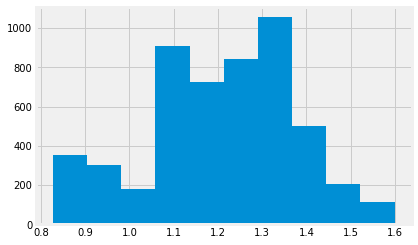

In [9]:
eurusd.close.hist()

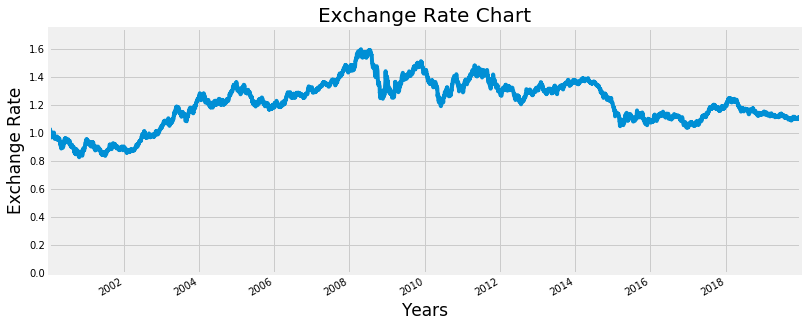

In [10]:
eurusd.close.plot(ylim=[0,1.75],figsize = (12,5)).autoscale(axis='x', tight=True)
plt.title('Exchange Rate Chart', size=20)
plt.xlabel('Years', size=17)
plt.ylabel('Exchange Rate', size=17)
plt.autoscale(enable=True, axis='x', tight=True)
plt.show()

In [11]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [13]:
mod = sm.tsa.statespace.SARIMAX(eurusd.close,
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9989      0.001   1767.637      0.000       0.998       1.000
ar.S.L12      -0.0025      0.011     -0.219      0.827      -0.025       0.020
ma.S.L12      -1.0014      0.009   -116.095      0.000      -1.018      -0.985
sigma2      5.399e-05    9.3e-07     58.065      0.000    5.22e-05    5.58e-05


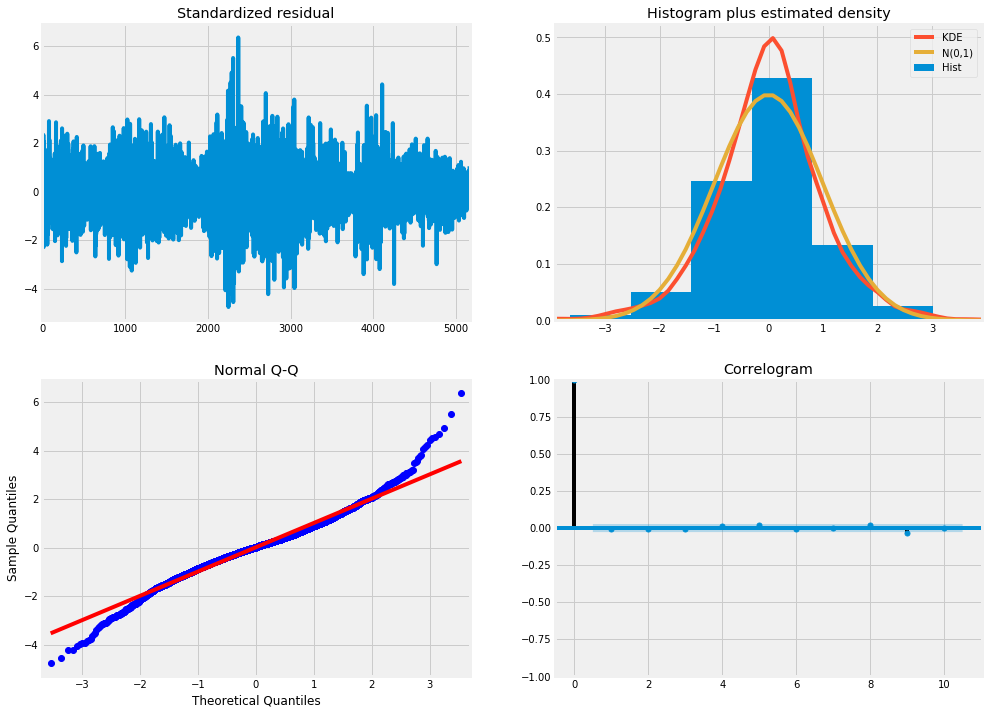

In [14]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

In this case, our model diagnostics suggests that the model residuals are normally distributed based on the following:

In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.
The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.
The residuals over time (top left plot) don’t display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

Those observations lead us to conclude that our model produces a satisfactory fit that could help us understand our time series data and forecast future values.

In [17]:
pred = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=False)
pred_ci = pred.conf_int()

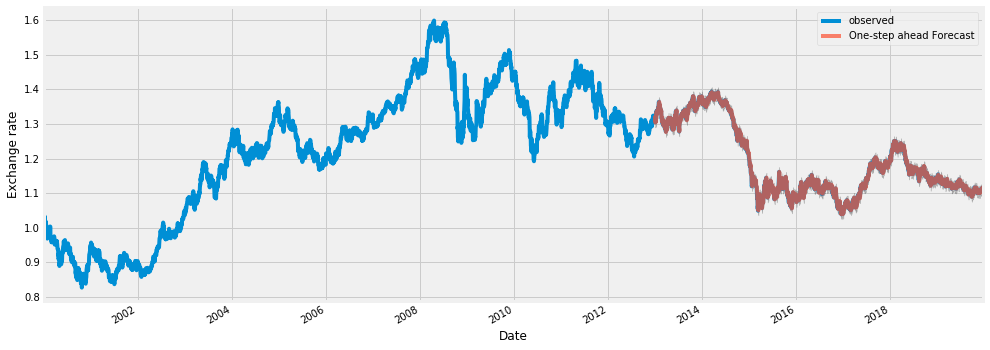

In [18]:
ax = eurusd.close['2000':].plot(label='observed', figsize = (15,6))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Exchange rate')
plt.legend()

plt.show()

In [19]:
eurusd_forecasted = pred.predicted_mean
eurusd_truth = eurusd.close['2013-01-01':]

# Compute the mean square error
mse = ((eurusd_forecasted - eurusd_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.0


In [21]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

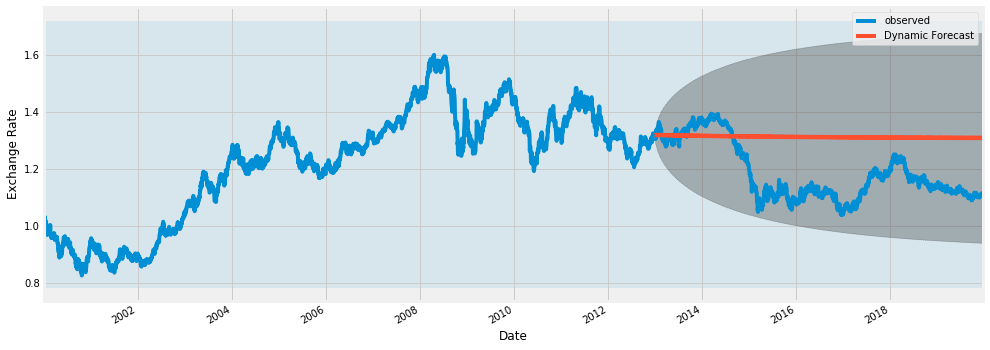

In [25]:
ax = eurusd.close['2000':].plot(label='observed', figsize=(15, 6))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-01-01'), eurusd.close.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Exchange Rate')

plt.legend()
plt.show()

In [31]:
# Extract the predicted and true values of our time series
eurusd_forecasted = pred_dynamic.predicted_mean
eurusd_truth = eurusd['2000-01-01':]

# Compute the mean square error
mse = ((eurusd_forecasted - eurusd_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.03


In [ ]:
# Carry out Decomposition

seasonal = seasonal_decompose(eurusd.close, model='multiplicative', freq=52)
seasonal.plot()
mpl.rcParams['figure.figsize'] = 12,6

STATIONARITY

In [ ]:
eurusd['12-month-SMA(close)'] = eurusd['close'].rolling(window=12).mean()
eurusd['12-month-std(close)'] = eurusd['close'].rolling(window=12).std()
eurusd[['close', '12-month-SMA(close)', '12-month-std(close)']].plot()
plt.ylim(0, 2)
plt.xlabel('Years', size=17)
plt.ylabel('Exchange Rate', size=17)
plt.autoscale(enable=True, axis='x', tight=True)#plt.axis('tight'
plt.tick_params(labelsize=14)
mpl.rcParams['figure.figsize'] = 12,6

From the chart above, it is clear that the Standard deviation is stationary, while the mean is not

In [ ]:
#eurusd['shift'] =  eurusd['close'].shift(1)
#eurusd.head()

In [ ]:
#eurusd['d1close'] = eurusd['close']  -  eurusd['close'].shift(1)
#eurusd[['d1close', 'close']].head()

In [ ]:
#eurusd['d1close'].plot(title='First order difference').autoscale(axis='x', tight='True')

In [ ]:
eurusd['d1close'] = eurusd['close'].diff()
eurusd['d1close'].plot(title='First order difference').autoscale(axis='x', tight='True')

In [ ]:
eurusd['12-month-SMA(close)'] = eurusd['d1close'].rolling(window=12).mean()
eurusd['12-month-std(close)'] = eurusd['d1close'].rolling(window=12).std()
eurusd[['d1close', '12-month-SMA(close)', '12-month-std(close)']].plot()
plt.xlabel('Years', size=17)
plt.ylabel('Exchange Rate', size=17)
plt.autoscale(enable=True, axis='x', tight=True)#plt.axis('tight'
plt.tick_params(labelsize=14)
mpl.rcParams['figure.figsize'] = 12,6

In [ ]:
print('Augmented Dickey-Fuller Test on EURUSD Exchange Rate Data')
dftest = adfuller(eurusd['close'], autolag='AIC')
dftest

Hypothesis Testing:
    
The Null hypothesis of this project states that the time series data of eurysd is non-stationary. Using the Dickey fuller test, I will determine below whether or not this is true.

In [ ]:
stepwise_fit = auto_arima(eurusd['close'], start_P = 1, start_q = 1, max_p = 3, max_q = 3, m=12, start_p = 0, seasonal =True
                          , d=None, D=1, trace=True, 
                           error_action='ignore', # We don't want to know if an order does not work
                           surpress_warnings=True, #We don't want convergence warnings
                           stepwise=True) #Set to stepwise
stepwise_fit.summary()

In [ ]:
#First order differencing

#import statsmodels.tsa.statespace.tools 
##import diff
#eurusd['d1'] = diff(eurusd['close'], k_diff = 1)

In [ ]:
print('Augmented Dickey-Fuller Test on EURUSD Exchange Rate Data')
dfout = pd.Series(dftest[0:4], index = ['ADF Test Statistic', 'p-value', '# lags used', '# observations'])

for key, val in dftest[4].items():
    dfout[f'critical value({key})']=val
    print(dfout)

The P-value above is greater than 5% using the dickey fuller test, hence we accept the null-hypothesis to be true, that our time series data for eurusd is non-stationary

MACHINE LEARNING

ARIMA MODEL

In [ ]:
eurusd.shape

In [ ]:
train = eurusd.close.iloc[:4457]
test  = eurusd.close.iloc[4457:]

In [ ]:
test

In [ ]:
from statsmodels.tsa.arima_model import ARIMA,ARIMAResults, ARIMA, ARIMAResults

In [ ]:
model = ARIMA(train, order = (1,0,0))
results = model.fit()
results.summary()

In [ ]:
# Obtain predicted values

start = len(train)
end = len(train) + len(test)
predictions = results.predict(start = start, end = end, dynamic = False).rename('ARIMA(1,0,0) Predictions')
#, typ='levels'

In [ ]:
# Compare predictions to expected values
forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]

In [ ]:
forecast_errors

In [ ]:
# Plot predictions against known values
ax = test['close'].plot(legend=True, figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis = 'x', tight=True)

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['close'], predictions)
print(f'ARIMA(1,0,0) MSE Error {error}')

In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['close'], predictions)
print(f'ARIMA(1,0,0) RMSE Error: {error:11.10}')

#### Retrain the model on the full data, and forecast the future

In [ ]:
model = ARIMA(eurusd['close'], order=(1,0,0))
results = model.fit()
fcast = results.predict(len(airline), len(airline)+365*10, typ='levels').rename('ARIMA(1,0,0)Forecast')

In [ ]:
# Plot predictions against known values

ax = eurusd['close'].plot(legend=True, figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)

#### SARIMAX MODEL

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model  = SARIMAX(train['close'], order=(1,0,0), seasonal_order=(1,1,1,12), enforce_invertibility=False)
results = model.fit()
results.summary()

In [ ]:
start = len(train)
end = len(train) + len(test)-1
predictions = results.predict(start = start, end = end, dynamic = False, typ='levels').rename('SARIMAX(1,0,0) Predictions')

In [ ]:
# Compare predictions to expected values

for i in range(len(predictions)):
    print(f"predicted={predictions[i]}, expected={test['close'][i]}")

In [ ]:
# Plot predictions against known values
ax = test['close'].plot(legend=True, figsize=(12,6))
predictions.plot(legend=True)
ax.autoscale(axis = 'x', tight=True)

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['close'], predictions)
print(f'SARIMAX(1,0,0) MSE Error {error}')

In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['close'], predictions)
print(f'SARIMAX(1,0,0) RMSE Error: {error:11.10}')

#### Retrain Sarimax model

In [ ]:
model = SARIMAX(eurusd['close'], order=(1,0,0), seasonal_order=(2,1,1,12), enforce_invinsibility=False)
results = model.fit()
fcast = results.predict(len(airline), len(airline)+365*10, typ='levels').rename('SARIMAX(1,0,0)Forecast')

In [ ]:
# Plot predictions against known values

ax = eurusd['close'].plot(legend=True, figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)

In [ ]:
#predict next value
predicted = StartARIMAForecasting(eurusdclose, 1,1,0)
#display the value
print('Predicted=%f' % (predicted))

In [ ]:
#Get exchange rates
ActualData = eurusdclose
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]

Predictions = list()

#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
    ActualValue =  TestData[timepoint]
    #forcast value
    Prediction = StartARIMAForecasting(Actual, 3,1,0)    
    print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
    #add it in the list
    Predictions.append(Prediction)
    Actual.append(ActualValue)
#Print MSE to see how good the model is
Error = mean_squared_error(TestData, Predictions)
print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
# plot
plt.plot(TestData)
plt.plot(Predictions, color='red')

In [ ]:
#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction